>>>>>># ***Facial Keypoints Detection***

***Data Source: https://www.kaggle.com/c/facial-keypoints-detection***

In [1]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3486/31310/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1629448285&Signature=riMuFte%2F5nPTeCxy1gARRLR7WZTBLSTWAY5mLi14RzOcenrF8n3loE%2FNf1sRLrLpEdGc03ciR3cqD%2FB56qlnlHdY6%2Fvka%2BjDcMi%2F19TYOPYSlHsINAiDTDX8R2ROCc8SAW1KxCXZzejM9%2BSzMTu4%2BD2QGntnBkA18q1LTGQ2f4dEREvI5q1VIuLVw1KeTOLq4ljxehOzH30aUO8MZabXxtQqp0lk%2BYdwdcd%2Bxg%2FqO8I%2B20mQCcyyZMGVEK3v1jxwTffLqKzHVbhEhgk7K8NlnptHcs%2FbZ7TPg0yNZP%2Bo6bkx0oiQisks5u9PxlRvd7ZevqTNV5oBk4eHvd2HNfdrkg%3D%3D&response-content-disposition=attachment%3B+filename%3Dfacial-keypoints-detection.zip" -c -O 'facial-keypoints-detection.zip'

--2021-08-19 09:15:02--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3486/31310/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1629448285&Signature=riMuFte%2F5nPTeCxy1gARRLR7WZTBLSTWAY5mLi14RzOcenrF8n3loE%2FNf1sRLrLpEdGc03ciR3cqD%2FB56qlnlHdY6%2Fvka%2BjDcMi%2F19TYOPYSlHsINAiDTDX8R2ROCc8SAW1KxCXZzejM9%2BSzMTu4%2BD2QGntnBkA18q1LTGQ2f4dEREvI5q1VIuLVw1KeTOLq4ljxehOzH30aUO8MZabXxtQqp0lk%2BYdwdcd%2Bxg%2FqO8I%2B20mQCcyyZMGVEK3v1jxwTffLqKzHVbhEhgk7K8NlnptHcs%2FbZ7TPg0yNZP%2Bo6bkx0oiQisks5u9PxlRvd7ZevqTNV5oBk4eHvd2HNfdrkg%3D%3D&response-content-disposition=attachment%3B+filename%3Dfacial-keypoints-detection.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 66.102.1.128, 142.250.110.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79999502 (76M) [application/zip]
Saving to: ‘facial-keypoints-d

In [2]:
!unzip facial-keypoints-detection.zip

Archive:  facial-keypoints-detection.zip
  inflating: IdLookupTable.csv       
  inflating: SampleSubmission.csv    
  inflating: test.zip                
  inflating: training.zip            


In [3]:
!unzip training.zip

Archive:  training.zip
  inflating: training.csv            


In [4]:
!unzip test.zip

Archive:  test.zip
  inflating: test.csv                


*Importing the libraries*

In [5]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Reading the Data*

In [6]:
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')
lookup_table = pd.read_csv('IdLookupTable.csv')

In [7]:
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [8]:
test_data.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [9]:
lookup_table.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


*Checking for null values as percentage of total data*

In [10]:
100*(train_data[train_data.columns[: -1]].isnull().sum()/len(train_data))

left_eye_center_x             0.141864
left_eye_center_y             0.141864
right_eye_center_x            0.184423
right_eye_center_y            0.184423
left_eye_inner_corner_x      67.782664
left_eye_inner_corner_y      67.782664
left_eye_outer_corner_x      67.839410
left_eye_outer_corner_y      67.839410
right_eye_inner_corner_x     67.825223
right_eye_inner_corner_y     67.825223
right_eye_outer_corner_x     67.825223
right_eye_outer_corner_y     67.825223
left_eyebrow_inner_end_x     67.796851
left_eyebrow_inner_end_y     67.796851
left_eyebrow_outer_end_x     68.435239
left_eyebrow_outer_end_y     68.435239
right_eyebrow_inner_end_x    67.796851
right_eyebrow_inner_end_y    67.796851
right_eyebrow_outer_end_x    68.279189
right_eyebrow_outer_end_y    68.279189
nose_tip_x                    0.000000
nose_tip_y                    0.000000
mouth_left_corner_x          67.811037
mouth_left_corner_y          67.811037
mouth_right_corner_x         67.796851
mouth_right_corner_y     

*Filling the null values*

In [11]:
train_data.fillna(method = 'ffill', inplace = True)

*To see if any co-ordinate has value less than 0*

In [22]:
count = 0
for i in train_data.columns[:-1]:
    if np.sum(train_data[i] < 0):
        count += 1
count

0

In [23]:
coords = train_data[train_data.columns[: -1]].values
images = []
for i in range(len(train_data)):
    image = np.array([float(j) for j in train_data['Image'].iloc[i].split()])
    image = image/(image.max())
    image = image.reshape((96, 96, 1))
    images.append(image)

images = np.array(images)

In [24]:
images = np.concatenate([images, images, images], axis = -1)
images.shape

(7049, 96, 96, 3)

*Splitting the data into train and validation data*

In [25]:
import random

random.seed(42)

train_idx = random.sample(range(7049), int(0.80*len(range(7049))))
val_idx = list(set(range(7049)).difference(set(train_idx)))

In [26]:
train_data = images[train_idx, :, :]
val_data = images[val_idx, :, :]

y_train = coords[train_idx, :]
y_val = coords[val_idx, :]

*Model Building*

In [31]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.layers import *
from tensorflow.keras import Model
import tensorflow

vgg_model = VGG16(include_top = False, input_shape = (96, 96, 3), weights = 'imagenet')

for layer in vgg_model.layers:
    layer.trainable = False

flat_1 = Flatten()(vgg_model.layers[-1].output)

dense_1 = Dense(1024, activation = 'relu', kernel_initializer = 'he_normal')(flat_1)
batch_1 = BatchNormalization()(dense_1)

output = Dense(30, activation = 'relu', kernel_initializer = 'he_normal')(batch_1)

model = Model(inputs = vgg_model.inputs, outputs = output)

model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
____________________________________________________________

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(horizontal_flip = True)
datagen_val = ImageDataGenerator()

In [33]:
callbacks = [tensorflow.keras.callbacks.ModelCheckpoint(filepath = 'model.h5', save_best_only = True),
             tensorflow.keras.callbacks.ReduceLROnPlateau(monitor = 'acc', factor = 0.1, patience = 2, mode = 'auto')]

In [34]:
adam = tf.keras.optimizers.Adam(0.001)
model.compile(loss = 'mean_squared_error', optimizer = adam, metrics = ['acc'])
model_result = model.fit_generator(datagen_train.flow(train_data, y_train, batch_size = 64),epochs = 50, 
                                   validation_data = datagen_val.flow(val_data, y_val), callbacks = callbacks)

Epoch 1/50
89/89 [==============================] - 20s 172ms/step - loss: 1864.8124 - acc: 0.1653 - val_loss: 1498.3798 - val_acc: 0.3787
Epoch 2/50
89/89 [==============================] - 12s 135ms/step - loss: 1146.2406 - acc: 0.3219 - val_loss: 547.2209 - val_acc: 0.4865
Epoch 3/50
89/89 [==============================] - 12s 134ms/step - loss: 342.4184 - acc: 0.4639 - val_loss: 240.0566 - val_acc: 0.5504
Epoch 4/50
89/89 [==============================] - 12s 135ms/step - loss: 27.0695 - acc: 0.6696 - val_loss: 119.6781 - val_acc: 0.6418
Epoch 5/50
89/89 [==============================] - 12s 134ms/step - loss: 8.0682 - acc: 0.7093 - val_loss: 16.5517 - val_acc: 0.6504
Epoch 6/50
89/89 [==============================] - 12s 133ms/step - loss: 7.4763 - acc: 0.7143 - val_loss: 25.7746 - val_acc: 0.6972
Epoch 7/50
89/89 [==============================] - 12s 133ms/step - loss: 7.0981 - acc: 0.7198 - val_loss: 18.1833 - val_acc: 0.7156
Epoch 8/50
89/89 [==============================

*Predictions on Validation data*

In [35]:
val_pred = model.predict_generator(val_data)

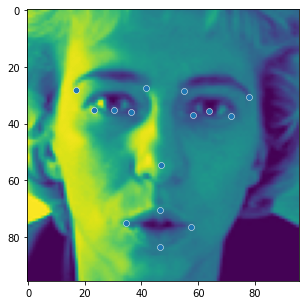

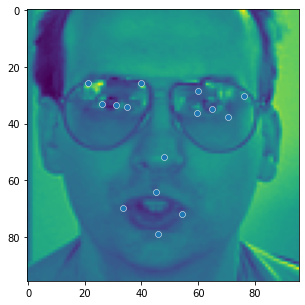

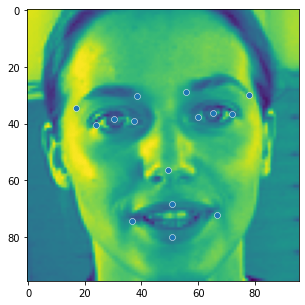

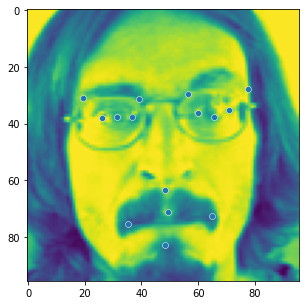

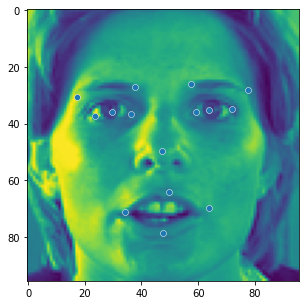

In [36]:
for i in range(5):
    plt.figure(figsize = (5, 5))
    plt.imshow(val_data[i][:, :, 0])
    sns.scatterplot(val_pred[i].reshape(15, 2)[:, 0], val_pred[i].reshape(15, 2)[:, 1])
    plt.show()

*Predictions on Test data*

In [37]:
test_images = []
for i in range(len(test_data)):
    image = np.array([float(j) for j in test_data['Image'].iloc[i].split()])
    image = image.reshape((96, 96, 1))
    test_images.append(image)

test_images = np.array(images)

In [38]:
test_preds = model.predict(test_images)

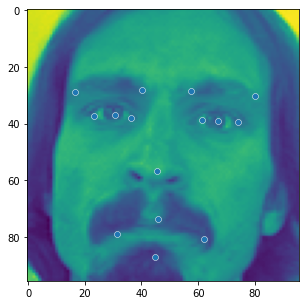

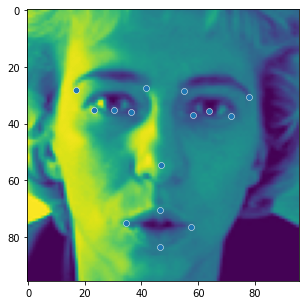

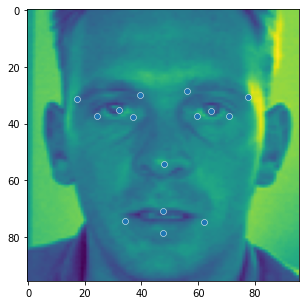

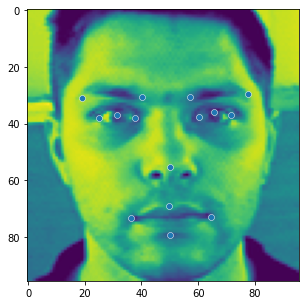

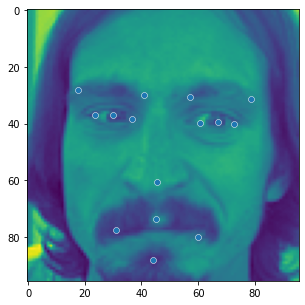

In [39]:
for i in range(5):
    plt.figure(figsize = (5, 5))
    plt.imshow(test_images[i][:, :, 0])
    sns.scatterplot(test_preds[i].reshape(15, 2)[:, 0], test_preds[i].reshape(15, 2)[:, 1])
    plt.show()